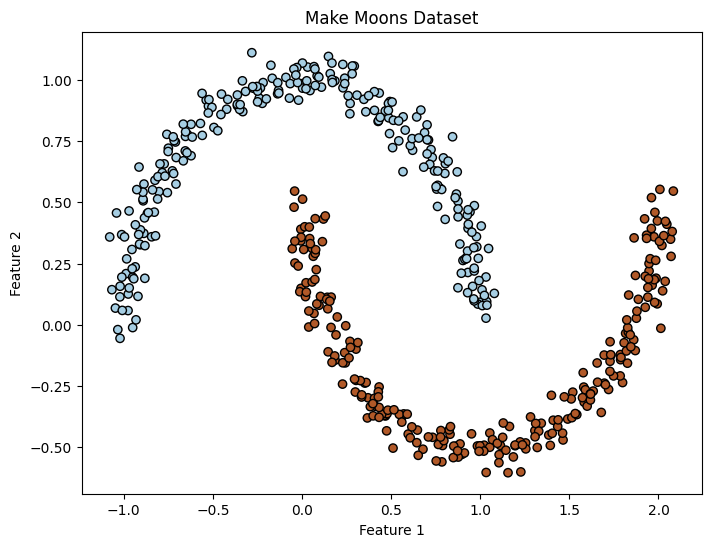

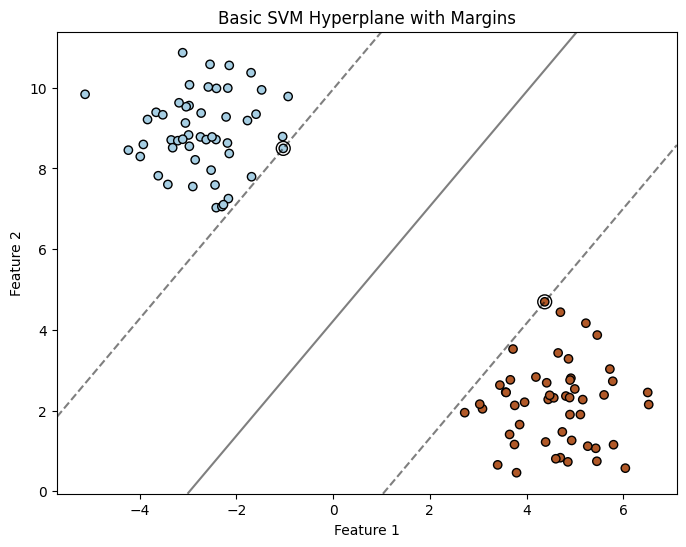

Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        75
           1       0.88      0.89      0.89        75

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



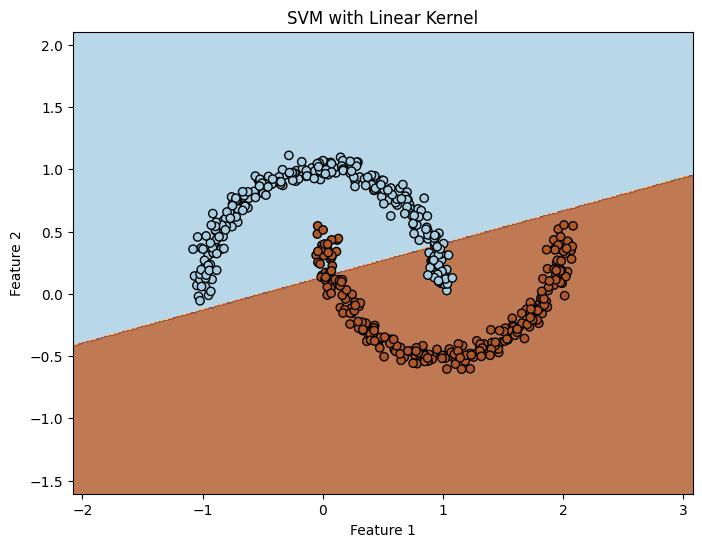

Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93        75
           1       0.89      0.99      0.94        75

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



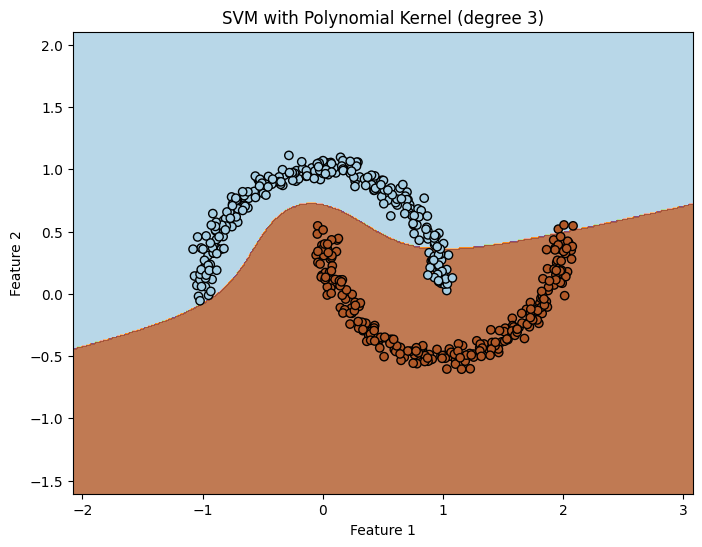

RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



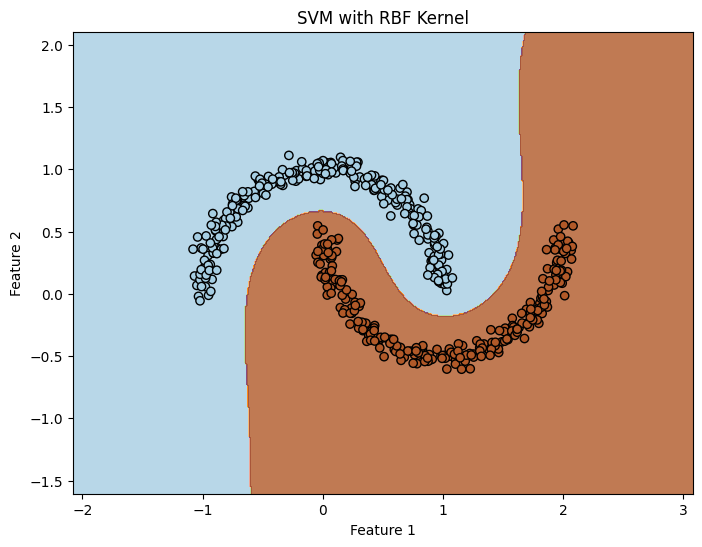

Sigmoid Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        75
           1       0.62      0.60      0.61        75

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.61       150
weighted avg       0.61      0.61      0.61       150



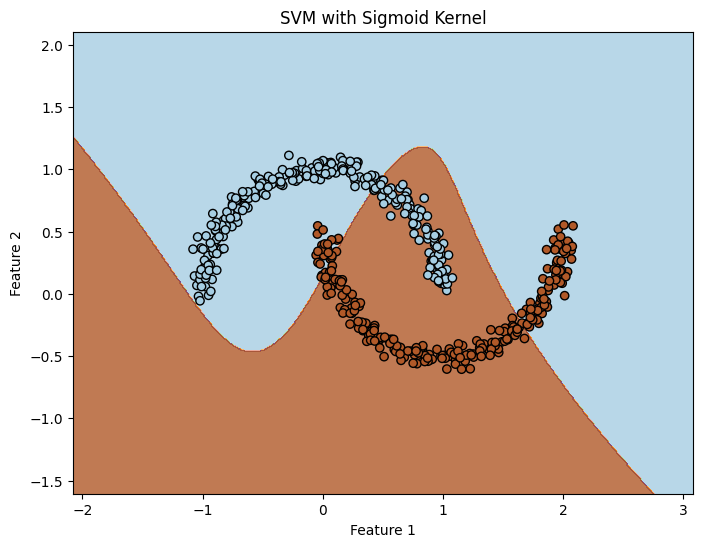

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Generate a non-linear dataset using make_moons
X, y = datasets.make_moons(n_samples=500, noise=0.05, random_state=42)

# Plot the Make Moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('moons_dataset.png')
plt.show()

# Generate a simple linear dataset for basic SVM demonstration
from sklearn.datasets import make_blobs
X_linear, y_linear = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# Fit basic linear SVM
svm_basic = SVC(kernel='linear', C=1.0)
svm_basic.fit(X_linear, y_linear)

# Function to plot basic SVM with hyperplane and margins
def plot_svm_basic(clf, X, y, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.savefig(filename)
    plt.show()

# Plot basic SVM
plot_svm_basic(svm_basic, X_linear, y_linear, 'Basic SVM Hyperplane with Margins', 'basic_svm_plot.png')

# Split the moons data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot the decision boundary for visualization (for kernels)
def plot_decision_boundary(clf, X, y, title, filename):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.savefig(filename)
    plt.show()

# 1. Linear Kernel SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear Kernel Classification Report:")
print(classification_report(y_test, y_pred_linear))
plot_decision_boundary(svm_linear, X, y, 'SVM with Linear Kernel', 'linear_kernel_plot.png')

# 2. Polynomial Kernel SVM (degree 3)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print("Polynomial Kernel Classification Report:")
print(classification_report(y_test, y_pred_poly))
plot_decision_boundary(svm_poly, X, y, 'SVM with Polynomial Kernel (degree 3)', 'poly_kernel_plot.png')

# 3. RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_rbf))
plot_decision_boundary(svm_rbf, X, y, 'SVM with RBF Kernel', 'rbf_kernel_plot.png')

# 4. Sigmoid Kernel SVM
svm_sigmoid = SVC(kernel='sigmoid', C=1.0)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
print("Sigmoid Kernel Classification Report:")
print(classification_report(y_test, y_pred_sigmoid))
plot_decision_boundary(svm_sigmoid, X, y, 'SVM with Sigmoid Kernel', 'sigmoid_kernel_plot.png')